<a href="https://colab.research.google.com/github/Arthurpbezerra/IcaHomework1/blob/main/vinho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***ICA - Homework 1 - Análise de Dados***

---


# *Importando* bibliotecas

In [80]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import csv 

# Importando os dados


##Dataset com todos os preditores e agrupando a qualidade em 3 classes

In [190]:
#Importando o dataset
url ='https://raw.githubusercontent.com/Arthurpbezerra/IcaHomework1/main/winequality-white.csv'
vinho_b= pd.read_csv(url,sep=";")

#Agrupando as classes de qualidade em 3 
vinho_b['quality'] = np.where(vinho_b['quality'] <= 4, 1, vinho_b['quality'])
vinho_b['quality'] = np.where((vinho_b["quality"] >= 5) & (vinho_b["quality"]<=7), 2, vinho_b['quality'])
vinho_b['quality'] = np.where(vinho_b["quality"] >= 8, 3, vinho_b['quality'])
#Imprimindo o dataset
vinho_b

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,2
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,2
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,2


##Removendo preditores

In [188]:
# Removendo preditores // Dataset sem alguns preditores
vinho_b2= pd.read_csv(url,sep=";")
vinho_b2.drop(["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide"],axis=1,inplace=True)
#Imprimindo o Dataset
vinho_b2

,density,pH,sulphates,alcohol,quality
0,1.00100,3.00,0.45,8.8,2
1,0.99400,3.30,0.49,9.5,2
2,0.99510,3.26,0.44,10.1,2
3,0.99560,3.19,0.40,9.9,2
4,0.99560,3.19,0.40,9.9,2
...,...,...,...,...,...
4893,0.99114,3.27,0.50,11.2,2
4894,0.99490,3.15,0.46,9.6,2
4895,0.99254,2.99,0.46,9.4,2
4896,0.98869,3.34,0.38,12.8,2


# -----?-----

---


Definindo as classes dos vinhos
<br>
bqw = bad quality white, 183 atributos
<br>
nqw = norma quality white, 4535 atributos
<br>
gqw = good quality white, 180 atributos

In [200]:
bqw = vinho_b[(vinho_b.quality <=4)]

In [201]:
nqw = vinho_b[(vinho_b.quality >= 5) & (vinho_b.quality<=7)]

In [202]:
gqw = vinho_b[(vinho_b.quality >=8)]

In [203]:
medias = vinho_b.mean(axis=0)
print(medias)

fixed acidity             6.854788
volatile acidity          0.278241
citric acid               0.334192
residual sugar            6.391415
chlorides                 0.045772
free sulfur dioxide      35.308085
total sulfur dioxide    138.360657
density                   0.994027
pH                        3.188267
sulphates                 0.489847
alcohol                  10.514267
quality                   1.999388
dtype: float64




---



#Análise Mono-Variada Não-Condicional

##Médias

In [149]:
fa_mean = vinho_b["fixed acidity"].mean()
va_mean = vinho_b["volatile acidity"].mean()
ca_mean = vinho_b["citric acid"].mean()
ch_mean = vinho_b["chlorides"].mean()
fsd_mean = vinho_b["free sulfur dioxide"].mean()
tsd_mean = vinho_b["total sulfur dioxide"].mean()
den_mean = vinho_b["density"].mean()
ph_mean = vinho_b["pH"].mean()
su_mean = vinho_b["sulphates"].mean()
al_mean = vinho_b["alcohol"].mean()

##Desvio Padrão

In [150]:
fa_std = vinho_b["fixed acidity"].std()
va_std = vinho_b["volatile acidity"].std()
ca_std = vinho_b["citric acid"].std()
ch_std = vinho_b["chlorides"].std()
fsd_std = vinho_b["free sulfur dioxide"].std()
tsd_std = vinho_b["total sulfur dioxide"].std()
den_std = vinho_b["density"].std()
ph_std = vinho_b["pH"].std()
su_std = vinho_b["sulphates"].std()
al_std = vinho_b["alcohol"].std()

##Distorção (Skewness)

In [151]:
fa_skew = vinho_b["fixed acidity"].skew()
va_skew = vinho_b["volatile acidity"].skew()
ca_skew = vinho_b["citric acid"].skew()
ch_skew = vinho_b["chlorides"].skew()
fsd_skew = vinho_b["free sulfur dioxide"].skew()
tsd_skew = vinho_b["total sulfur dioxide"].skew()
den_skew = vinho_b["density"].skew()
ph_skew = vinho_b["pH"].skew()
su_skew = vinho_b["sulphates"].skew()
al_skew = vinho_b["alcohol"].skew()

Table of means,std and skew

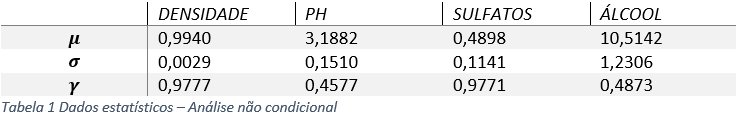


##Histogramas

(array([  2.,   2.,   3.,   2.,  14.,  31.,  51.,  55., 102., 209., 287.,
        349., 694., 526., 549., 432., 386., 317., 246., 167., 136., 108.,
         67.,  40.,  34.,  44.,  14.,   7.,  12.,   5.,   1.,   2.,   0.,
          2.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 3.8  ,  4.008,  4.216,  4.424,  4.632,  4.84 ,  5.048,  5.256,
         5.464,  5.672,  5.88 ,  6.088,  6.296,  6.504,  6.712,  6.92 ,
         7.128,  7.336,  7.544,  7.752,  7.96 ,  8.168,  8.376,  8.584,
         8.792,  9.   ,  9.208,  9.416,  9.624,  9.832, 10.04 , 10.248,
        10.456, 10.664, 10.872, 11.08 , 11.288, 11.496, 11.704, 11.912,
        12.12 , 12.328, 12.536, 12.744, 12.952, 13.16 , 13.368, 13.576,
        13.784, 13.992, 14.2  ]),
 <a list of 50 Patch objects>)

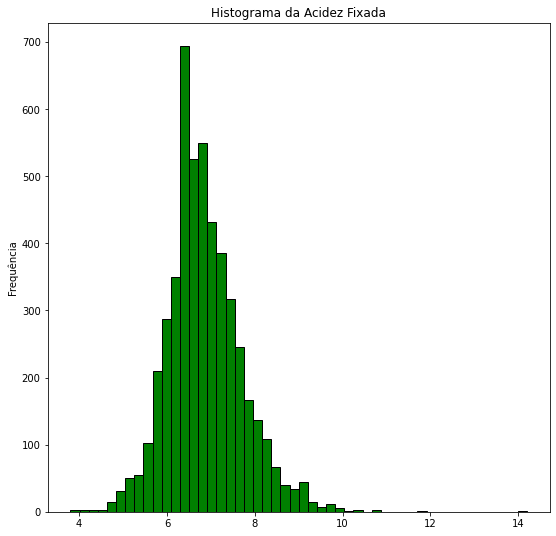

In [ ]:
fig, ax = plt.subplots(figsize = (9,9))
plt.title("Histograma da Acidez Fixada")
plt.ylabel("Frequência")
ax.hist(vinho_b["fixed acidity"], bins= 50, edgecolor="black", color="green")

(array([ 12.,  56., 104., 238., 320., 389., 425., 477., 485., 489., 366.,
        338., 287., 193., 132., 123.,  96.,  87.,  57.,  38.,  30.,  20.,
         19.,  25.,  13.,  20.,  11.,   9.,  12.,   6.,   6.,   1.,   2.,
          2.,   2.,   0.,   1.,   1.,   0.,   0.,   2.,   1.,   0.,   1.,
          0.,   1.,   0.,   0.,   0.,   1.]),
 array([0.08  , 0.1004, 0.1208, 0.1412, 0.1616, 0.182 , 0.2024, 0.2228,
        0.2432, 0.2636, 0.284 , 0.3044, 0.3248, 0.3452, 0.3656, 0.386 ,
        0.4064, 0.4268, 0.4472, 0.4676, 0.488 , 0.5084, 0.5288, 0.5492,
        0.5696, 0.59  , 0.6104, 0.6308, 0.6512, 0.6716, 0.692 , 0.7124,
        0.7328, 0.7532, 0.7736, 0.794 , 0.8144, 0.8348, 0.8552, 0.8756,
        0.896 , 0.9164, 0.9368, 0.9572, 0.9776, 0.998 , 1.0184, 1.0388,
        1.0592, 1.0796, 1.1   ]),
 <a list of 50 Patch objects>)

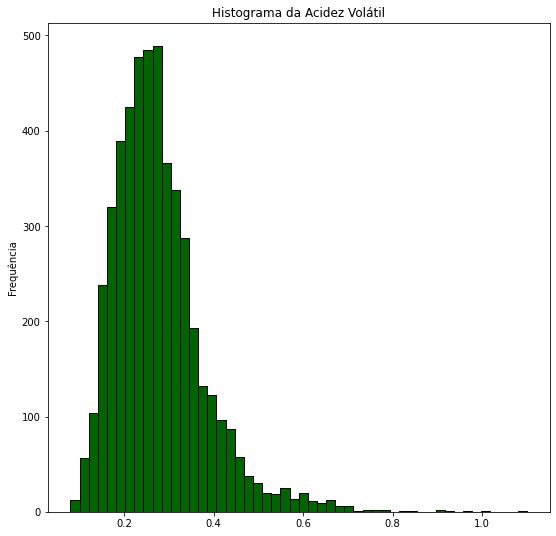

In [ ]:
fig, ax = plt.subplots(figsize = (9,9))
plt.title("Histograma da Acidez Volátil")
plt.ylabel("Frequência")
ax.hist(vinho_b["volatile acidity"], bins= 50, edgecolor="black", color="darkgreen")

(array([ 34.,  23.,  28.,  51.,  83., 124., 323., 536., 721., 947., 539.,
        357., 331., 160., 292.,  99.,  52.,  40.,  33.,  21.,  19.,  22.,
         41.,   4.,   6.,   1.,   1.,   2.,   0.,   1.,   5.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.    , 0.0332, 0.0664, 0.0996, 0.1328, 0.166 , 0.1992, 0.2324,
        0.2656, 0.2988, 0.332 , 0.3652, 0.3984, 0.4316, 0.4648, 0.498 ,
        0.5312, 0.5644, 0.5976, 0.6308, 0.664 , 0.6972, 0.7304, 0.7636,
        0.7968, 0.83  , 0.8632, 0.8964, 0.9296, 0.9628, 0.996 , 1.0292,
        1.0624, 1.0956, 1.1288, 1.162 , 1.1952, 1.2284, 1.2616, 1.2948,
        1.328 , 1.3612, 1.3944, 1.4276, 1.4608, 1.494 , 1.5272, 1.5604,
        1.5936, 1.6268, 1.66  ]),
 <a list of 50 Patch objects>)

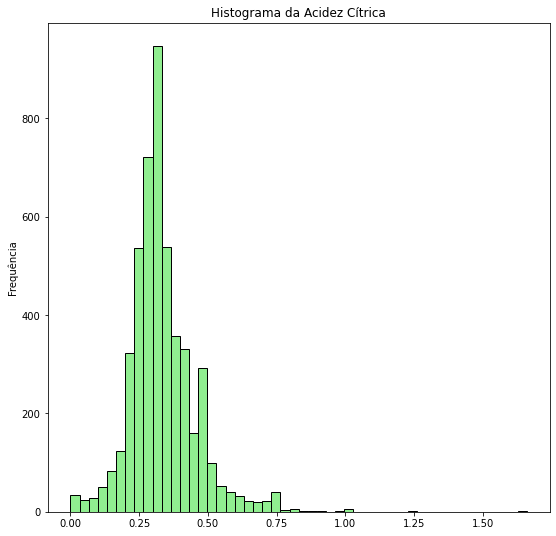

In [ ]:
fig, ax = plt.subplots(figsize = (9,9))
plt.title("Histograma da Acidez Cítrica")
plt.ylabel("Frequência")
ax.hist(vinho_b["citric acid"], bins= 50, edgecolor="black", color="lightgreen")

(array([1.100e+01, 8.300e+01, 3.620e+02, 7.410e+02, 1.197e+03, 1.171e+03,
        7.670e+02, 2.470e+02, 1.070e+02, 3.700e+01, 2.000e+01, 1.800e+01,
        2.200e+01, 6.000e+00, 7.000e+00, 3.000e+00, 1.500e+01, 6.000e+00,
        6.000e+00, 5.000e+00, 8.000e+00, 8.000e+00, 3.000e+00, 9.000e+00,
        1.100e+01, 4.000e+00, 3.000e+00, 3.000e+00, 4.000e+00, 4.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.009  , 0.01574, 0.02248, 0.02922, 0.03596, 0.0427 , 0.04944,
        0.05618, 0.06292, 0.06966, 0.0764 , 0.08314, 0.08988, 0.09662,
        0.10336, 0.1101 , 0.11684, 0.12358, 0.13032, 0.13706, 0.1438 ,
        0.15054, 0.15728, 0.16402, 0.17076, 0.1775 , 0.18424, 0.19098,
        0.19772, 0.20446, 0.2112 , 0.21794, 0.22468, 0.23142, 0.23816,
        0.2449 , 0.25

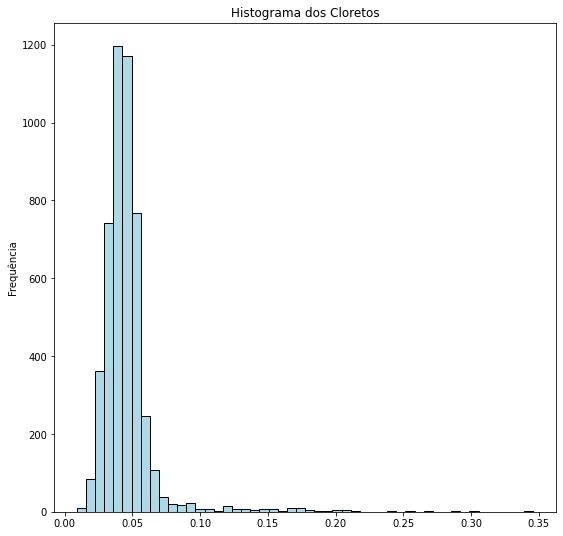

In [ ]:
fig, ax = plt.subplots(figsize = (9,9))
plt.title("Histograma dos Cloretos")
plt.ylabel("Frequência")
ax.hist(vinho_b["chlorides"], bins= 50, edgecolor="black", color="lightblue")

(array([104., 271., 459., 526., 712., 739., 600., 400., 420., 281., 187.,
         92.,  40.,  26.,  14.,   2.,   8.,   4.,   4.,   1.,   2.,   2.,
          1.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  2.  ,   7.74,  13.48,  19.22,  24.96,  30.7 ,  36.44,  42.18,
         47.92,  53.66,  59.4 ,  65.14,  70.88,  76.62,  82.36,  88.1 ,
         93.84,  99.58, 105.32, 111.06, 116.8 , 122.54, 128.28, 134.02,
        139.76, 145.5 , 151.24, 156.98, 162.72, 168.46, 174.2 , 179.94,
        185.68, 191.42, 197.16, 202.9 , 208.64, 214.38, 220.12, 225.86,
        231.6 , 237.34, 243.08, 248.82, 254.56, 260.3 , 266.04, 271.78,
        277.52, 283.26, 289.  ]),
 <a list of 50 Patch objects>)

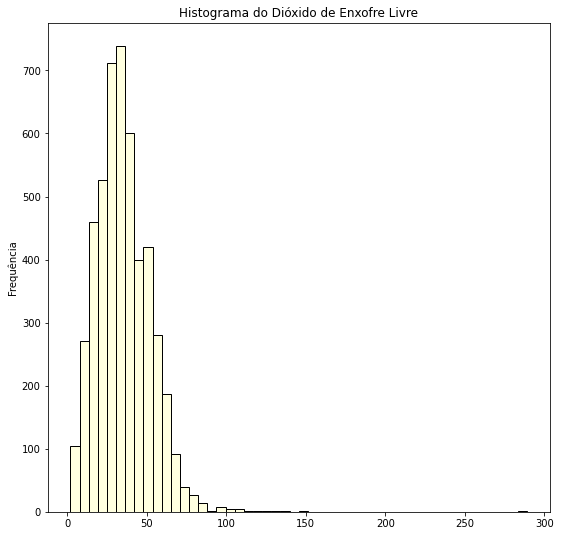

In [ ]:
fig, ax = plt.subplots(figsize = (9,9))
plt.title("Histograma do Dióxido de Enxofre Livre")
plt.ylabel("Frequência")
ax.hist(vinho_b["free sulfur dioxide"], bins= 50, edgecolor="black", color="lightyellow")

(array([  2.,   9.,  12.,  10.,  19.,  36.,  78., 123., 182., 263., 307.,
        378., 446., 365., 388., 295., 357., 318., 250., 250., 230., 161.,
        113., 107.,  73.,  46.,  31.,  25.,  12.,   2.,   2.,   1.,   0.,
          1.,   2.,   1.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  9.  ,  17.62,  26.24,  34.86,  43.48,  52.1 ,  60.72,  69.34,
         77.96,  86.58,  95.2 , 103.82, 112.44, 121.06, 129.68, 138.3 ,
        146.92, 155.54, 164.16, 172.78, 181.4 , 190.02, 198.64, 207.26,
        215.88, 224.5 , 233.12, 241.74, 250.36, 258.98, 267.6 , 276.22,
        284.84, 293.46, 302.08, 310.7 , 319.32, 327.94, 336.56, 345.18,
        353.8 , 362.42, 371.04, 379.66, 388.28, 396.9 , 405.52, 414.14,
        422.76, 431.38, 440.  ]),
 <a list of 50 Patch objects>)

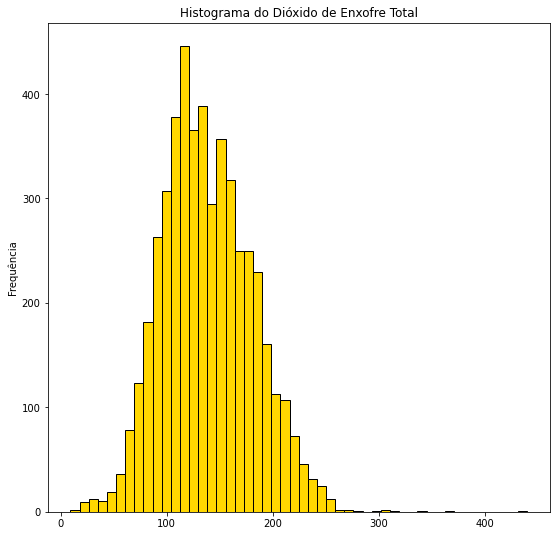

In [ ]:
fig, ax = plt.subplots(figsize = (9,9))
plt.title("Histograma do Dióxido de Enxofre Total")
plt.ylabel("Frequência")
ax.hist(vinho_b["total sulfur dioxide"], bins= 50, edgecolor="black", color="gold")

(array([ 14.,  93., 346., 496., 629., 641., 545., 556., 467., 353., 395.,
        212., 122.,  18.,   6.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.98711  , 0.9881474, 0.9891848, 0.9902222, 0.9912596, 0.992297 ,
        0.9933344, 0.9943718, 0.9954092, 0.9964466, 0.997484 , 0.9985214,
        0.9995588, 1.0005962, 1.0016336, 1.002671 , 1.0037084, 1.0047458,
        1.0057832, 1.0068206, 1.007858 , 1.0088954, 1.0099328, 1.0109702,
        1.0120076, 1.013045 , 1.0140824, 1.0151198, 1.0161572, 1.0171946,
        1.018232 , 1.0192694, 1.0203068, 1.0213442, 1.0223816, 1.023419 ,
        1.0244564, 1.0254938, 1.0265312, 1.0275686, 1.028606 , 1.0296434,
        1.0306808, 1.0317182, 1.0327556, 1.033793 , 1.0348304, 1.0358678,
        1.0369052, 1.0379426, 1.03898  ]),
 <a list of 50 Patch ob

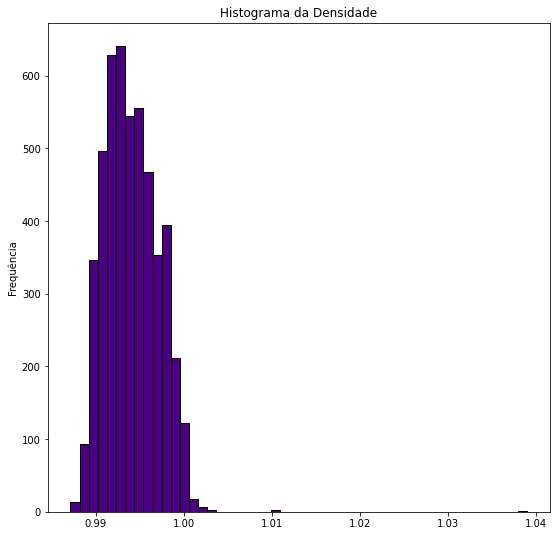

In [ ]:
fig, ax = plt.subplots(figsize = (9,9))
plt.title("Histograma da Densidade")
plt.ylabel("Frequência")
ax.hist(vinho_b["density"], bins= 50, edgecolor="black", color="indigo")

(array([  2.,   0.,   1.,   6.,   1.,  14.,  18.,  28.,  46.,  56., 124.,
         73., 142., 117., 175., 283., 228., 261., 251., 308., 426., 282.,
        241., 248., 210., 257., 172., 135., 127., 132., 137.,  78.,  53.,
         45.,  42.,  52.,  30.,  23.,  13.,  11.,  11.,   8.,   9.,   3.,
          3.,   3.,   4.,   4.,   1.,   4.]),
 array([2.72 , 2.742, 2.764, 2.786, 2.808, 2.83 , 2.852, 2.874, 2.896,
        2.918, 2.94 , 2.962, 2.984, 3.006, 3.028, 3.05 , 3.072, 3.094,
        3.116, 3.138, 3.16 , 3.182, 3.204, 3.226, 3.248, 3.27 , 3.292,
        3.314, 3.336, 3.358, 3.38 , 3.402, 3.424, 3.446, 3.468, 3.49 ,
        3.512, 3.534, 3.556, 3.578, 3.6  , 3.622, 3.644, 3.666, 3.688,
        3.71 , 3.732, 3.754, 3.776, 3.798, 3.82 ]),
 <a list of 50 Patch objects>)

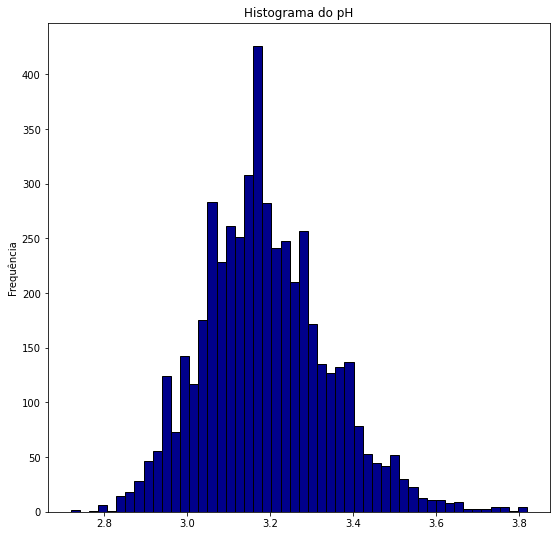

In [ ]:
fig, ax = plt.subplots(figsize = (9,9))
plt.title("Histograma do pH")
plt.ylabel("Frequência")
ax.hist(vinho_b["pH"], bins= 50, edgecolor="black", color="darkblue")

(array([  2.,   4.,  17.,  13.,  47.,  89., 143.,  85., 249., 365., 168.,
        320., 377., 403., 172., 345., 389., 156., 302., 210., 182.,  97.,
        133., 116.,  95.,  36.,  79.,  57.,  18.,  45.,  41.,  35.,  19.,
         21.,  18.,   2.,   7.,   4.,   8.,   5.,   2.,   2.,   5.,   4.,
          7.,   2.,   0.,   0.,   1.,   1.]),
 array([0.22  , 0.2372, 0.2544, 0.2716, 0.2888, 0.306 , 0.3232, 0.3404,
        0.3576, 0.3748, 0.392 , 0.4092, 0.4264, 0.4436, 0.4608, 0.478 ,
        0.4952, 0.5124, 0.5296, 0.5468, 0.564 , 0.5812, 0.5984, 0.6156,
        0.6328, 0.65  , 0.6672, 0.6844, 0.7016, 0.7188, 0.736 , 0.7532,
        0.7704, 0.7876, 0.8048, 0.822 , 0.8392, 0.8564, 0.8736, 0.8908,
        0.908 , 0.9252, 0.9424, 0.9596, 0.9768, 0.994 , 1.0112, 1.0284,
        1.0456, 1.0628, 1.08  ]),
 <a list of 50 Patch objects>)

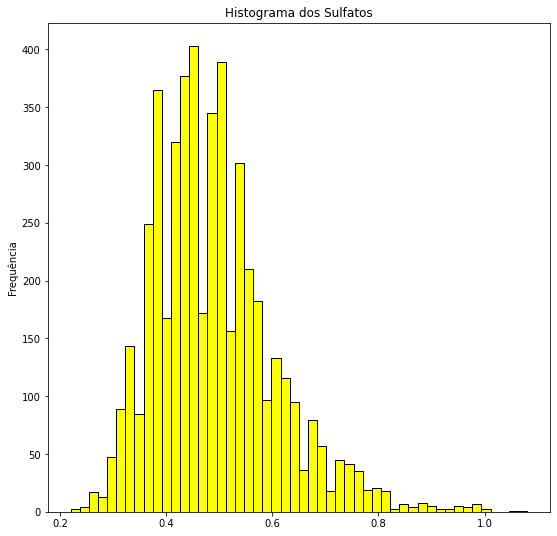

In [ ]:
fig, ax = plt.subplots(figsize = (9,9))
plt.title("Histograma dos Sulfatos")
plt.ylabel("Frequência")
ax.hist(vinho_b["sulphates"], bins= 50, edgecolor="black", color="yellow")

(array([  2.,   0.,   0.,   3.,  32.,  78., 107.,  95., 329., 199., 134.,
        229., 361., 108., 137., 109., 277., 135.,  85., 155., 278.,  97.,
        135.,  93., 162., 195., 105., 129.,  89., 107.,  63.,  57., 104.,
        139.,  64.,  68.,  83., 119.,  57.,  41.,  37.,  33.,   7.,  20.,
         13.,  16.,   2.,   3.,   6.,   1.]),
 array([ 8.   ,  8.124,  8.248,  8.372,  8.496,  8.62 ,  8.744,  8.868,
         8.992,  9.116,  9.24 ,  9.364,  9.488,  9.612,  9.736,  9.86 ,
         9.984, 10.108, 10.232, 10.356, 10.48 , 10.604, 10.728, 10.852,
        10.976, 11.1  , 11.224, 11.348, 11.472, 11.596, 11.72 , 11.844,
        11.968, 12.092, 12.216, 12.34 , 12.464, 12.588, 12.712, 12.836,
        12.96 , 13.084, 13.208, 13.332, 13.456, 13.58 , 13.704, 13.828,
        13.952, 14.076, 14.2  ]),
 <a list of 50 Patch objects>)

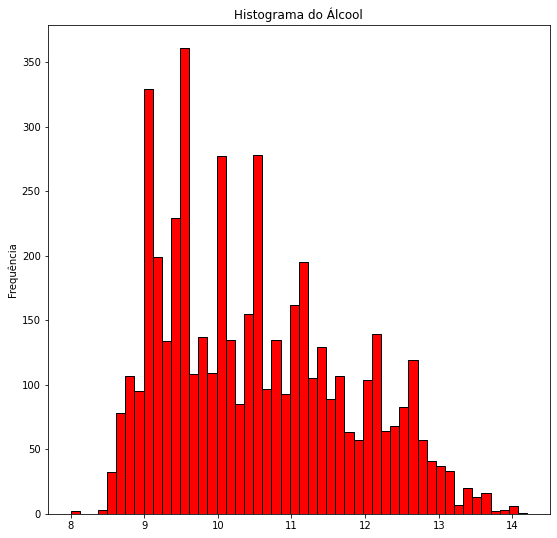

In [ ]:
fig, ax = plt.subplots(figsize = (9,9))
plt.title("Histograma do Álcool")
plt.ylabel("Frequência")
ax.hist(vinho_b["alcohol"], bins= 50, edgecolor="black", color="red")

(array([  20.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  163.,
           0.,    0.,    0.,    0.,    0.,    0.,    0., 1457.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0., 2198.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,  880.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,  175.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    5.]),
 array([3.  , 3.12, 3.24, 3.36, 3.48, 3.6 , 3.72, 3.84, 3.96, 4.08, 4.2 ,
        4.32, 4.44, 4.56, 4.68, 4.8 , 4.92, 5.04, 5.16, 5.28, 5.4 , 5.52,
        5.64, 5.76, 5.88, 6.  , 6.12, 6.24, 6.36, 6.48, 6.6 , 6.72, 6.84,
        6.96, 7.08, 7.2 , 7.32, 7.44, 7.56, 7.68, 7.8 , 7.92, 8.04, 8.16,
        8.28, 8.4 , 8.52, 8.64, 8.76, 8.88, 9.  ]),
 <a list of 50 Patch objects>)

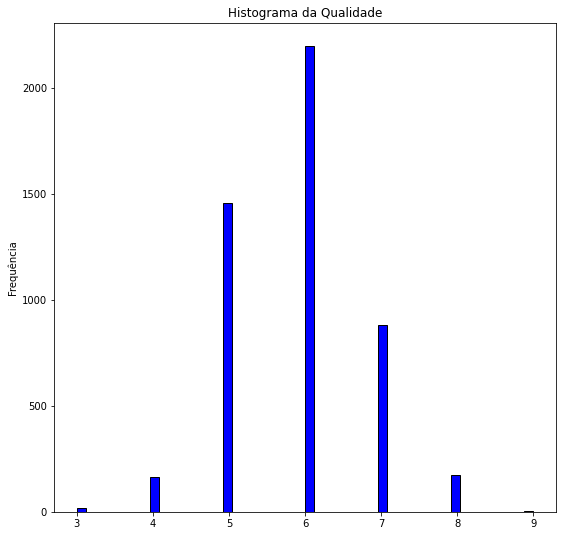

In [ ]:
fig, ax = plt.subplots(figsize = (9,9))
plt.title("Histograma da Qualidade")
plt.ylabel("Frequência")
ax.hist(vinho_b["quality"], bins= 50, edgecolor="black", color="blue")

#Análise Mono-Variada Condicional

##Tipo 1: Vinhos brancos de qualidade ruim

###✴ Histogramas

(array([2., 0., 1., 1., 3., 3., 3., 5., 2., 7., 3., 1., 5., 3., 6., 8., 7.,
        6., 5., 5., 7., 9., 3., 7., 5., 7., 9., 3., 7., 3., 2., 5., 2., 5.,
        1., 5., 0., 3., 3., 5., 7., 2., 1., 1., 0., 1., 1., 1., 1., 1.]),
 array([0.9892  , 0.989424, 0.989648, 0.989872, 0.990096, 0.99032 ,
        0.990544, 0.990768, 0.990992, 0.991216, 0.99144 , 0.991664,
        0.991888, 0.992112, 0.992336, 0.99256 , 0.992784, 0.993008,
        0.993232, 0.993456, 0.99368 , 0.993904, 0.994128, 0.994352,
        0.994576, 0.9948  , 0.995024, 0.995248, 0.995472, 0.995696,
        0.99592 , 0.996144, 0.996368, 0.996592, 0.996816, 0.99704 ,
        0.997264, 0.997488, 0.997712, 0.997936, 0.99816 , 0.998384,
        0.998608, 0.998832, 0.999056, 0.99928 , 0.999504, 0.999728,
        0.999952, 1.000176, 1.0004  ]),
 <a list of 50 Patch objects>)

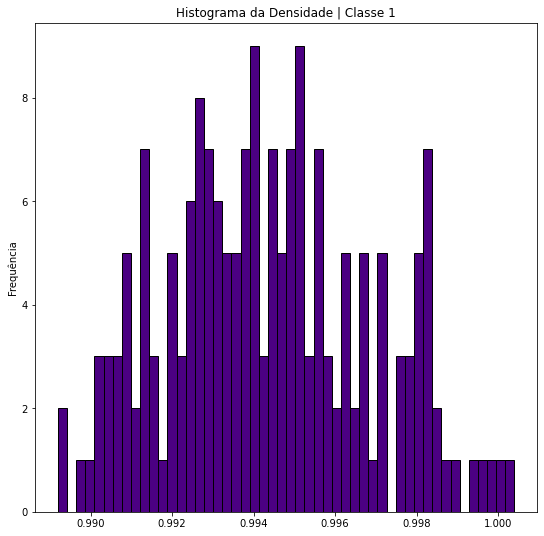

In [152]:
fig, ax = plt.subplots(figsize = (9,9))
plt.title("Histograma da Densidade | Classe 1")
plt.ylabel("Frequência")
ax.hist(bqw["density"], bins= 50, edgecolor="black", color="indigo")

(array([ 1.,  0.,  2.,  3.,  2.,  3.,  1.,  3.,  3.,  5.,  4.,  9., 11.,
         4., 11.,  8.,  6., 11., 10.,  7.,  7.,  5.,  2., 12.,  4.,  5.,
         6.,  5.,  1.,  5.,  5.,  0.,  2.,  3.,  1.,  3.,  1.,  3.,  2.,
         3.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.]),
 array([2.83  , 2.8478, 2.8656, 2.8834, 2.9012, 2.919 , 2.9368, 2.9546,
        2.9724, 2.9902, 3.008 , 3.0258, 3.0436, 3.0614, 3.0792, 3.097 ,
        3.1148, 3.1326, 3.1504, 3.1682, 3.186 , 3.2038, 3.2216, 3.2394,
        3.2572, 3.275 , 3.2928, 3.3106, 3.3284, 3.3462, 3.364 , 3.3818,
        3.3996, 3.4174, 3.4352, 3.453 , 3.4708, 3.4886, 3.5064, 3.5242,
        3.542 , 3.5598, 3.5776, 3.5954, 3.6132, 3.631 , 3.6488, 3.6666,
        3.6844, 3.7022, 3.72  ]),
 <a list of 50 Patch objects>)

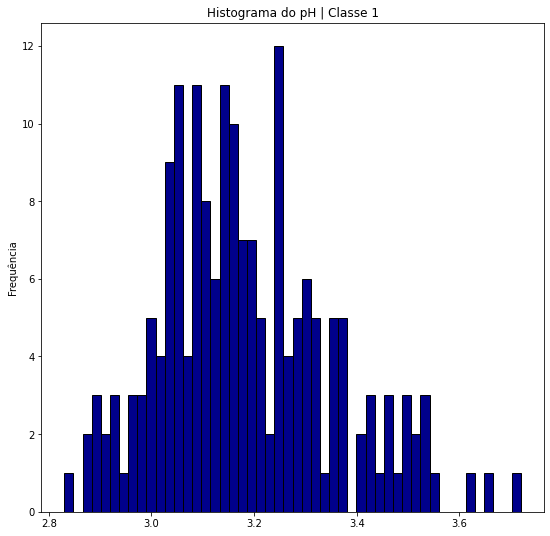

In [153]:
fig, ax = plt.subplots(figsize = (9,9))
plt.title("Histograma do pH | Classe 1")
plt.ylabel("Frequência")
ax.hist(bqw["pH"], bins= 50, edgecolor="black", color="darkblue")

(array([ 1.,  0.,  3.,  0.,  6.,  4.,  1.,  8., 11.,  6.,  9.,  5.,  9.,
         0.,  6.,  7., 15.,  9.,  7.,  5.,  8.,  7.,  4.,  8.,  3.,  7.,
         3.,  2.,  3.,  3.,  3.,  4.,  3.,  3.,  1.,  1.,  1.,  2.,  0.,
         1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([0.25  , 0.2624, 0.2748, 0.2872, 0.2996, 0.312 , 0.3244, 0.3368,
        0.3492, 0.3616, 0.374 , 0.3864, 0.3988, 0.4112, 0.4236, 0.436 ,
        0.4484, 0.4608, 0.4732, 0.4856, 0.498 , 0.5104, 0.5228, 0.5352,
        0.5476, 0.56  , 0.5724, 0.5848, 0.5972, 0.6096, 0.622 , 0.6344,
        0.6468, 0.6592, 0.6716, 0.684 , 0.6964, 0.7088, 0.7212, 0.7336,
        0.746 , 0.7584, 0.7708, 0.7832, 0.7956, 0.808 , 0.8204, 0.8328,
        0.8452, 0.8576, 0.87  ]),
 <a list of 50 Patch objects>)

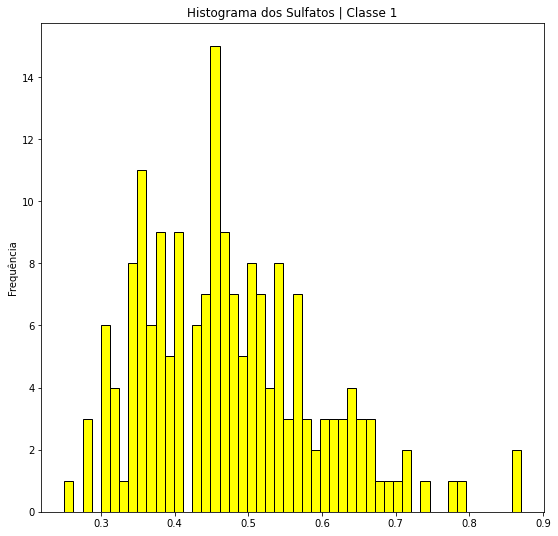

In [154]:
fig, ax = plt.subplots(figsize = (9,9))
plt.title("Histograma dos Sulfatos | Classe 1")
plt.ylabel("Frequência")
ax.hist(bqw["sulphates"], bins= 50, edgecolor="black", color="yellow")

(array([ 1.,  0.,  0.,  1.,  1.,  4.,  2.,  2.,  3., 11., 13.,  3., 11.,
         9.,  4.,  6.,  5.,  5.,  8.,  9., 13.,  7., 10.,  4.,  2.,  4.,
         2.,  6.,  3.,  6.,  6.,  4.,  3.,  3.,  1.,  0.,  1.,  1.,  1.,
         0.,  3.,  2.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([ 8.  ,  8.11,  8.22,  8.33,  8.44,  8.55,  8.66,  8.77,  8.88,
         8.99,  9.1 ,  9.21,  9.32,  9.43,  9.54,  9.65,  9.76,  9.87,
         9.98, 10.09, 10.2 , 10.31, 10.42, 10.53, 10.64, 10.75, 10.86,
        10.97, 11.08, 11.19, 11.3 , 11.41, 11.52, 11.63, 11.74, 11.85,
        11.96, 12.07, 12.18, 12.29, 12.4 , 12.51, 12.62, 12.73, 12.84,
        12.95, 13.06, 13.17, 13.28, 13.39, 13.5 ]),
 <a list of 50 Patch objects>)

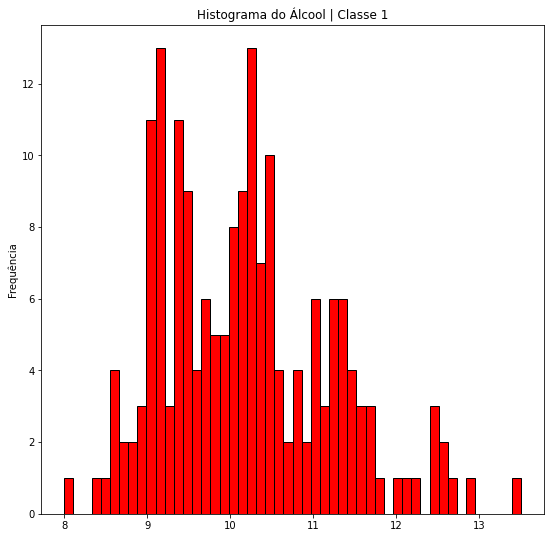

In [155]:
fig, ax = plt.subplots(figsize = (9,9))
plt.title("Histograma do Álcool | Classe 1")
plt.ylabel("Frequência")
ax.hist(bqw["alcohol"], bins= 50, edgecolor="black", color="red")

(array([ 20.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 163.]),
 array([3.  , 3.02, 3.04, 3.06, 3.08, 3.1 , 3.12, 3.14, 3.16, 3.18, 3.2 ,
        3.22, 3.24, 3.26, 3.28, 3.3 , 3.32, 3.34, 3.36, 3.38, 3.4 , 3.42,
        3.44, 3.46, 3.48, 3.5 , 3.52, 3.54, 3.56, 3.58, 3.6 , 3.62, 3.64,
        3.66, 3.68, 3.7 , 3.72, 3.74, 3.76, 3.78, 3.8 , 3.82, 3.84, 3.86,
        3.88, 3.9 , 3.92, 3.94, 3.96, 3.98, 4.  ]),
 <a list of 50 Patch objects>)

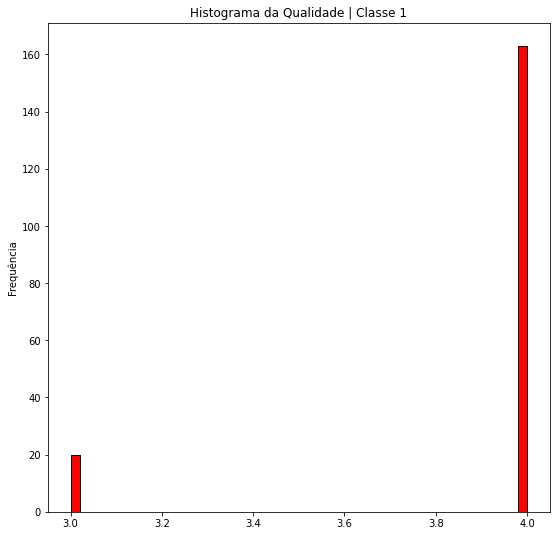

In [156]:
fig, ax = plt.subplots(figsize = (9,9))
plt.title("Histograma da Qualidade | Classe 1")
plt.ylabel("Frequência")
ax.hist(bqw["quality"], bins= 50, edgecolor="black", color="red")

###Média

In [157]:
bfa_mean = bqw["fixed acidity"].mean()
bva_mean = bqw["volatile acidity"].mean()
bca_mean = bqw["citric acid"].mean()
bch_mean = bqw["chlorides"].mean()
bfsd_mean = bqw["free sulfur dioxide"].mean()
btsd_mean = bqw["total sulfur dioxide"].mean()
bden_mean = bqw["density"].mean()
bph_mean = bqw["pH"].mean()
bsu_mean = bqw["sulphates"].mean()
bal_mean = bqw["alcohol"].mean()

###Desvio Padrão

In [158]:
bfa_std = bqw["fixed acidity"].std()
bva_std = bqw["volatile acidity"].std()
bca_std = bqw["citric acid"].std()
bch_std = bqw["chlorides"].std()
bfsd_std = bqw["free sulfur dioxide"].std()
btsd_std = bqw["total sulfur dioxide"].std()
bden_std = bqw["density"].std()
bph_std = bqw["pH"].std()
bsu_std = bqw["sulphates"].std()
bal_std = bqw["alcohol"].std()

###Distorção (Skewness)

In [159]:
bfa_skew = bqw["fixed acidity"].skew()
bva_skew = bqw["volatile acidity"].skew()
bca_skew = bqw["citric acid"].skew()
bch_skew = bqw["chlorides"].skew()
bfsd_skew = bqw["free sulfur dioxide"].skew()
btsd_skew = bqw["total sulfur dioxide"].skew()
bden_skew = bqw["density"].skew()
bph_skew = bqw["pH"].skew()
bsu_skew = bqw["sulphates"].skew()
bal_skew = bqw["alcohol"].skew()

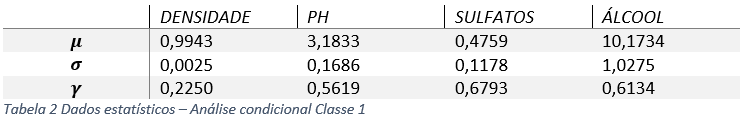

##Tipo 2: Vinhos brancos de qualidade normal

###✴ Histogramas

(array([ 13.,  82., 308., 440., 586., 591., 501., 514., 446., 340., 368.,
        202., 117.,  16.,   6.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.98711  , 0.9881474, 0.9891848, 0.9902222, 0.9912596, 0.992297 ,
        0.9933344, 0.9943718, 0.9954092, 0.9964466, 0.997484 , 0.9985214,
        0.9995588, 1.0005962, 1.0016336, 1.002671 , 1.0037084, 1.0047458,
        1.0057832, 1.0068206, 1.007858 , 1.0088954, 1.0099328, 1.0109702,
        1.0120076, 1.013045 , 1.0140824, 1.0151198, 1.0161572, 1.0171946,
        1.018232 , 1.0192694, 1.0203068, 1.0213442, 1.0223816, 1.023419 ,
        1.0244564, 1.0254938, 1.0265312, 1.0275686, 1.028606 , 1.0296434,
        1.0306808, 1.0317182, 1.0327556, 1.033793 , 1.0348304, 1.0358678,
        1.0369052, 1.0379426, 1.03898  ]),
 <a list of 50 Patch ob

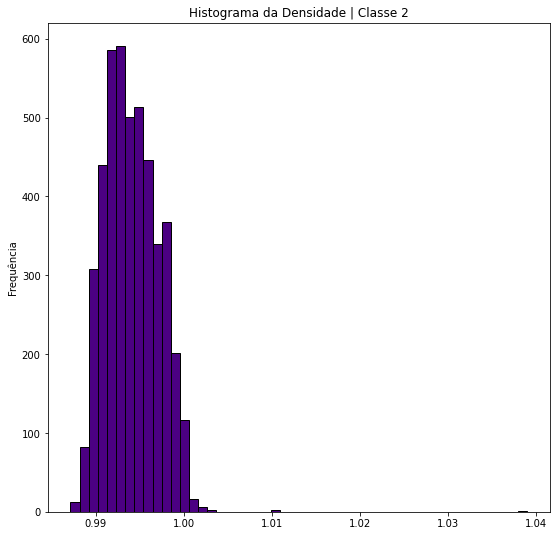

In [160]:
fig, ax = plt.subplots(figsize = (9,9))
plt.title("Histograma da Densidade | Classe 2")
plt.ylabel("Frequência")
ax.hist(nqw["density"], bins= 50, edgecolor="black", color="indigo")

(array([  2.,   0.,   1.,   6.,   1.,  13.,  17.,  25.,  43.,  53., 110.,
         70., 130., 109., 158., 263., 210., 251., 237., 288., 399., 263.,
        230., 227., 193., 239., 158., 121., 117., 120., 125.,  67.,  50.,
         41.,  38.,  48.,  25.,  19.,  11.,  10.,  11.,   7.,   8.,   3.,
          3.,   2.,   4.,   4.,   1.,   4.]),
 array([2.72 , 2.742, 2.764, 2.786, 2.808, 2.83 , 2.852, 2.874, 2.896,
        2.918, 2.94 , 2.962, 2.984, 3.006, 3.028, 3.05 , 3.072, 3.094,
        3.116, 3.138, 3.16 , 3.182, 3.204, 3.226, 3.248, 3.27 , 3.292,
        3.314, 3.336, 3.358, 3.38 , 3.402, 3.424, 3.446, 3.468, 3.49 ,
        3.512, 3.534, 3.556, 3.578, 3.6  , 3.622, 3.644, 3.666, 3.688,
        3.71 , 3.732, 3.754, 3.776, 3.798, 3.82 ]),
 <a list of 50 Patch objects>)

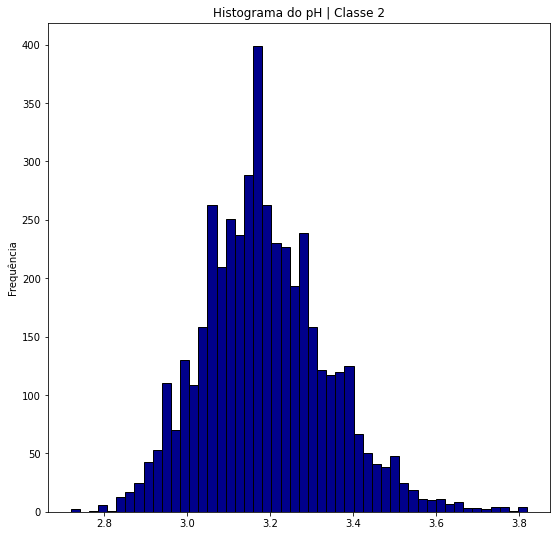

In [161]:
fig, ax = plt.subplots(figsize = (9,9))
plt.title("Histograma do pH | Classe 2")
plt.ylabel("Frequência")
ax.hist(nqw["pH"], bins= 50, edgecolor="black", color="darkblue")

(array([  2.,   2.,  13.,  10.,  43.,  74., 118.,  78., 230., 332., 152.,
        305., 362., 376., 160., 320., 369., 149., 286., 203., 167.,  87.,
        121., 109.,  80.,  34.,  77.,  53.,  14.,  45.,  37.,  32.,  17.,
         19.,  17.,   2.,   5.,   2.,   8.,   3.,   2.,   1.,   4.,   4.,
          7.,   2.,   0.,   0.,   1.,   1.]),
 array([0.22  , 0.2372, 0.2544, 0.2716, 0.2888, 0.306 , 0.3232, 0.3404,
        0.3576, 0.3748, 0.392 , 0.4092, 0.4264, 0.4436, 0.4608, 0.478 ,
        0.4952, 0.5124, 0.5296, 0.5468, 0.564 , 0.5812, 0.5984, 0.6156,
        0.6328, 0.65  , 0.6672, 0.6844, 0.7016, 0.7188, 0.736 , 0.7532,
        0.7704, 0.7876, 0.8048, 0.822 , 0.8392, 0.8564, 0.8736, 0.8908,
        0.908 , 0.9252, 0.9424, 0.9596, 0.9768, 0.994 , 1.0112, 1.0284,
        1.0456, 1.0628, 1.08  ]),
 <a list of 50 Patch objects>)

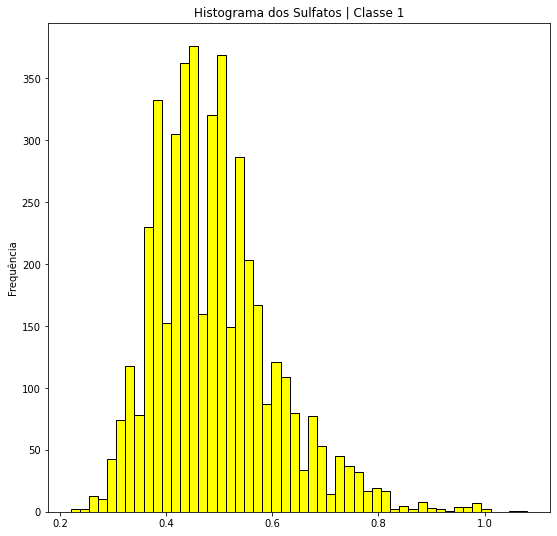

In [162]:
fig, ax = plt.subplots(figsize = (9,9))
plt.title("Histograma dos Sulfatos | Classe 1")
plt.ylabel("Frequência")
ax.hist(nqw["sulphates"], bins= 50, edgecolor="black", color="yellow")

(array([  1.,   0.,   0.,   2.,  26.,  76.,  94.,  86., 313., 191., 131.,
        218., 347., 102., 129., 104., 260., 125.,  82., 140., 260.,  91.,
        131.,  88., 149., 175., 100., 123.,  79.,  94.,  59.,  49.,  98.,
        125.,  57.,  56.,  71., 102.,  48.,  34.,  31.,  28.,   7.,  14.,
         12.,  16.,   2.,   3.,   5.,   1.]),
 array([ 8.   ,  8.124,  8.248,  8.372,  8.496,  8.62 ,  8.744,  8.868,
         8.992,  9.116,  9.24 ,  9.364,  9.488,  9.612,  9.736,  9.86 ,
         9.984, 10.108, 10.232, 10.356, 10.48 , 10.604, 10.728, 10.852,
        10.976, 11.1  , 11.224, 11.348, 11.472, 11.596, 11.72 , 11.844,
        11.968, 12.092, 12.216, 12.34 , 12.464, 12.588, 12.712, 12.836,
        12.96 , 13.084, 13.208, 13.332, 13.456, 13.58 , 13.704, 13.828,
        13.952, 14.076, 14.2  ]),
 <a list of 50 Patch objects>)

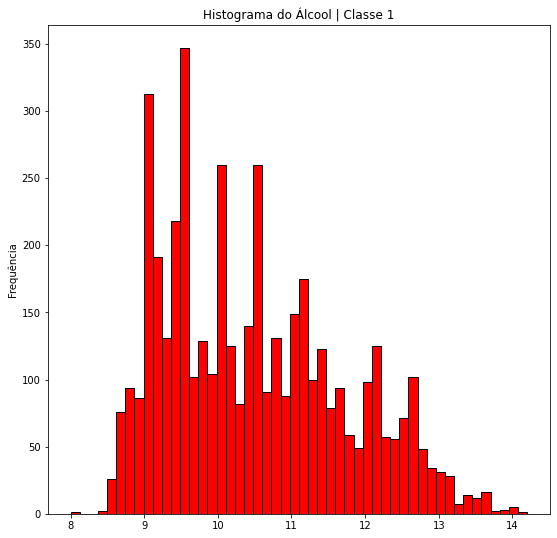

In [163]:
fig, ax = plt.subplots(figsize = (9,9))
plt.title("Histograma do Álcool | Classe 1")
plt.ylabel("Frequência")
ax.hist(nqw["alcohol"], bins= 50, edgecolor="black", color="red")

(array([1457.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0., 2198.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,  880.]),
 array([5.  , 5.04, 5.08, 5.12, 5.16, 5.2 , 5.24, 5.28, 5.32, 5.36, 5.4 ,
        5.44, 5.48, 5.52, 5.56, 5.6 , 5.64, 5.68, 5.72, 5.76, 5.8 , 5.84,
        5.88, 5.92, 5.96, 6.  , 6.04, 6.08, 6.12, 6.16, 6.2 , 6.24, 6.28,
        6.32, 6.36, 6.4 , 6.44, 6.48, 6.52, 6.56, 6.6 , 6.64, 6.68, 6.72,
        6.76, 6.8 , 6.84, 6.88, 6.92, 6.96, 7.  ]),
 <a list of 50 Patch objects>)

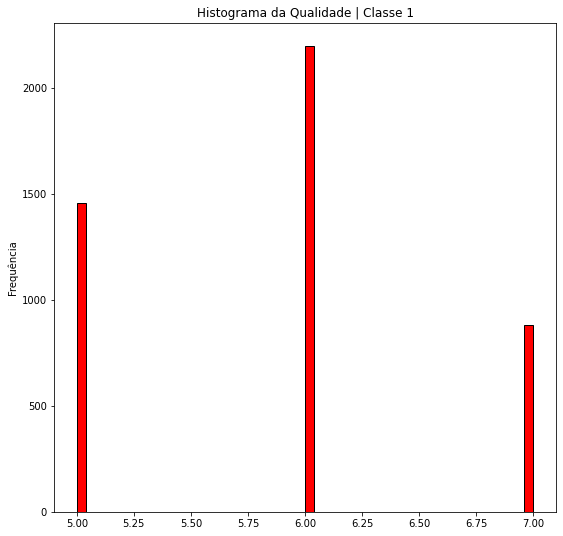

In [164]:
fig, ax = plt.subplots(figsize = (9,9))
plt.title("Histograma da Qualidade | Classe 1")
plt.ylabel("Frequência")
ax.hist(nqw["quality"], bins= 50, edgecolor="black", color="red")

###Média

In [165]:
nfa_mean = nqw["fixed acidity"].mean()
nva_mean = nqw["volatile acidity"].mean()
nca_mean = nqw["citric acid"].mean()
nch_mean = nqw["chlorides"].mean()
nfsd_mean = nqw["free sulfur dioxide"].mean()
ntsd_mean = nqw["total sulfur dioxide"].mean()
nden_mean = nqw["density"].mean()
nph_mean = nqw["pH"].mean()
nsu_mean = nqw["sulphates"].mean()
nal_mean = nqw["alcohol"].mean()

###Desvio Padrão

In [166]:
nfa_std = nqw["fixed acidity"].std()
nva_std = nqw["volatile acidity"].std()
nca_std = nqw["citric acid"].std()
nch_std = nqw["chlorides"].std()
nfsd_std = nqw["free sulfur dioxide"].std()
ntsd_std = nqw["total sulfur dioxide"].std()
nden_std = nqw["density"].std()
nph_std = nqw["pH"].std()
nsu_std = nqw["sulphates"].std()
nal_std = nqw["alcohol"].std()

###Distorção (Skewness)

In [167]:
nfa_skew = nqw["fixed acidity"].skew()
nva_skew = nqw["volatile acidity"].skew()
nca_skew = nqw["citric acid"].skew()
nch_skew = nqw["chlorides"].skew()
nfsd_skew = nqw["free sulfur dioxide"].skew()
ntsd_skew = nqw["total sulfur dioxide"].skew()
nden_skew = nqw["density"].skew()
nph_skew = nqw["pH"].skew()
nsu_skew = nqw["sulphates"].skew()
nal_skew = nqw["alcohol"].skew()

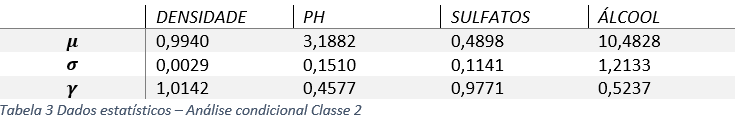

##Tipo 3: Vinhos brancos de boa qualidade

###✴ Histogramas

(array([ 1.,  0.,  0.,  0.,  0.,  3.,  7.,  4., 13.,  6.,  6., 12., 10.,
         9.,  7., 10.,  6.,  9.,  6.,  5.,  7.,  7.,  3.,  9.,  3.,  3.,
         4.,  2.,  1.,  6.,  0.,  3.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  8.,  0.,  0.,  0.,  6.,  0.,  0.,  1.,  0.,  2.]),
 array([0.98713  , 0.9873994, 0.9876688, 0.9879382, 0.9882076, 0.988477 ,
        0.9887464, 0.9890158, 0.9892852, 0.9895546, 0.989824 , 0.9900934,
        0.9903628, 0.9906322, 0.9909016, 0.991171 , 0.9914404, 0.9917098,
        0.9919792, 0.9922486, 0.992518 , 0.9927874, 0.9930568, 0.9933262,
        0.9935956, 0.993865 , 0.9941344, 0.9944038, 0.9946732, 0.9949426,
        0.995212 , 0.9954814, 0.9957508, 0.9960202, 0.9962896, 0.996559 ,
        0.9968284, 0.9970978, 0.9973672, 0.9976366, 0.997906 , 0.9981754,
        0.9984448, 0.9987142, 0.9989836, 0.999253 , 0.9995224, 0.9997918,
        1.0000612, 1.0003306, 1.0006   ]),
 <a list of 50 Patch objects>)

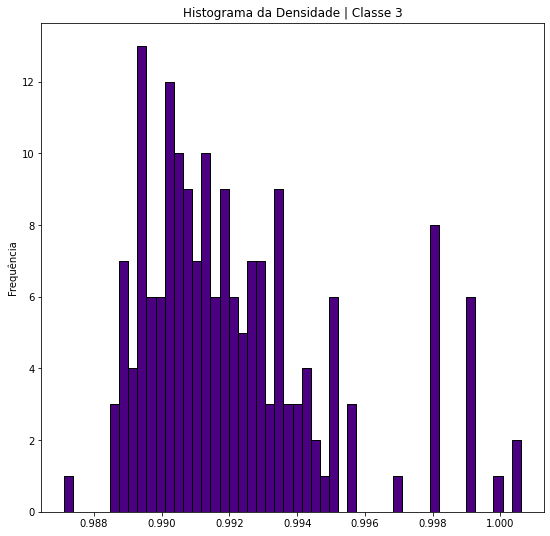

In [168]:
fig, ax = plt.subplots(figsize = (9,9))
plt.title("Histograma da Densidade | Classe 3")
plt.ylabel("Frequência")
ax.hist(gqw["density"], bins= 50, edgecolor="black", color="indigo")

(array([ 9.,  1.,  1.,  5.,  1.,  1.,  4.,  7.,  0.,  4.,  4.,  4.,  0.,
         4.,  6.,  8.,  6.,  5.,  0.,  7.,  6.,  5.,  4., 12.,  7.,  4.,
         6.,  7.,  1.,  3.,  9.,  3.,  5.,  6.,  3.,  1.,  8.,  2.,  0.,
         2.,  2.,  0.,  0.,  0.,  0.,  1.,  3.,  1.,  1.,  1.]),
 array([2.94 , 2.953, 2.966, 2.979, 2.992, 3.005, 3.018, 3.031, 3.044,
        3.057, 3.07 , 3.083, 3.096, 3.109, 3.122, 3.135, 3.148, 3.161,
        3.174, 3.187, 3.2  , 3.213, 3.226, 3.239, 3.252, 3.265, 3.278,
        3.291, 3.304, 3.317, 3.33 , 3.343, 3.356, 3.369, 3.382, 3.395,
        3.408, 3.421, 3.434, 3.447, 3.46 , 3.473, 3.486, 3.499, 3.512,
        3.525, 3.538, 3.551, 3.564, 3.577, 3.59 ]),
 <a list of 50 Patch objects>)

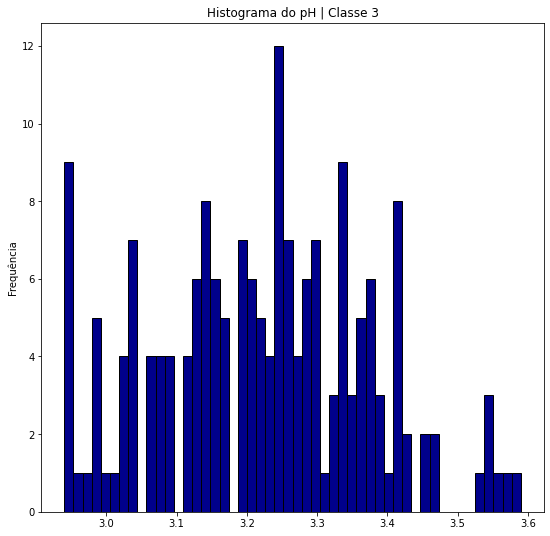

In [169]:
fig, ax = plt.subplots(figsize = (9,9))
plt.title("Histograma do pH | Classe 3")
plt.ylabel("Frequência")
ax.hist(gqw["pH"], bins= 50, edgecolor="black", color="darkblue")

(array([ 3.,  2.,  0.,  1.,  1., 14.,  9.,  6.,  3., 14., 14.,  9.,  5.,
         1.,  1., 14.,  7., 15.,  3.,  0.,  4.,  2.,  4.,  3.,  8.,  8.,
         1.,  7.,  2.,  0.,  0.,  2.,  2.,  0.,  0.,  3.,  1.,  3.,  1.,
         0.,  1.,  0.,  2.,  0.,  0.,  0.,  2.,  0.,  0.,  2.]),
 array([0.25 , 0.264, 0.278, 0.292, 0.306, 0.32 , 0.334, 0.348, 0.362,
        0.376, 0.39 , 0.404, 0.418, 0.432, 0.446, 0.46 , 0.474, 0.488,
        0.502, 0.516, 0.53 , 0.544, 0.558, 0.572, 0.586, 0.6  , 0.614,
        0.628, 0.642, 0.656, 0.67 , 0.684, 0.698, 0.712, 0.726, 0.74 ,
        0.754, 0.768, 0.782, 0.796, 0.81 , 0.824, 0.838, 0.852, 0.866,
        0.88 , 0.894, 0.908, 0.922, 0.936, 0.95 ]),
 <a list of 50 Patch objects>)

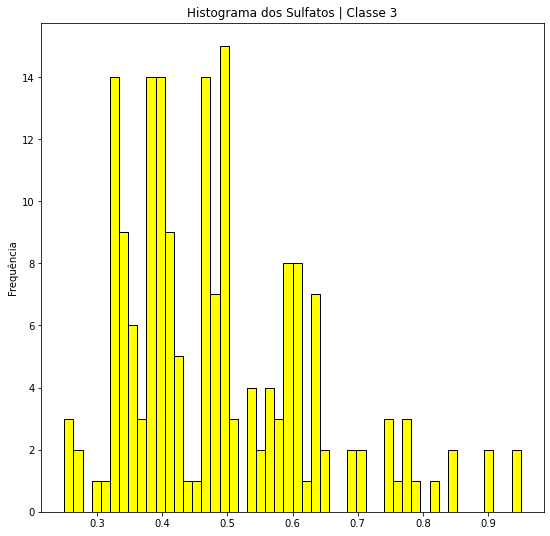

In [170]:
fig, ax = plt.subplots(figsize = (9,9))
plt.title("Histograma dos Sulfatos | Classe 3")
plt.ylabel("Frequência")
ax.hist(gqw["sulphates"], bins= 50, edgecolor="black", color="yellow")

(array([ 1.,  0., 11.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  3.,  0.,
         0.,  0.,  0.,  0.,  8.,  4.,  0.,  4.,  3.,  7.,  5.,  6.,  4.,
         1.,  6.,  2.,  5., 11.,  5.,  6.,  6.,  7., 10., 11.,  8.,  6.,
         9., 12.,  2.,  3.,  0.,  6.,  0.,  0.,  0.,  0.,  1.]),
 array([ 8.5 ,  8.61,  8.72,  8.83,  8.94,  9.05,  9.16,  9.27,  9.38,
         9.49,  9.6 ,  9.71,  9.82,  9.93, 10.04, 10.15, 10.26, 10.37,
        10.48, 10.59, 10.7 , 10.81, 10.92, 11.03, 11.14, 11.25, 11.36,
        11.47, 11.58, 11.69, 11.8 , 11.91, 12.02, 12.13, 12.24, 12.35,
        12.46, 12.57, 12.68, 12.79, 12.9 , 13.01, 13.12, 13.23, 13.34,
        13.45, 13.56, 13.67, 13.78, 13.89, 14.  ]),
 <a list of 50 Patch objects>)

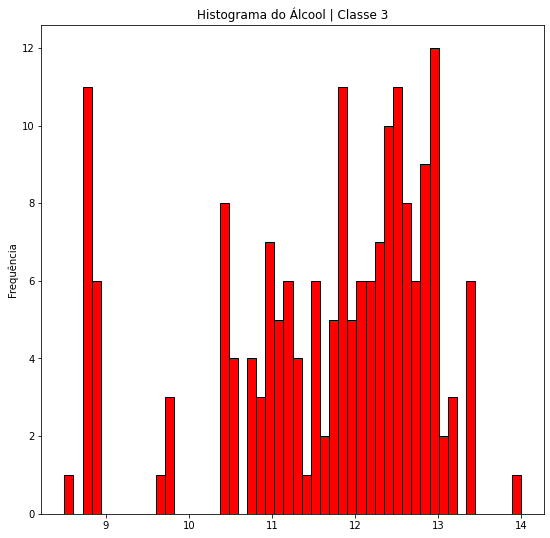

In [171]:
fig, ax = plt.subplots(figsize = (9,9))
plt.title("Histograma do Álcool | Classe 3")
plt.ylabel("Frequência")
ax.hist(gqw["alcohol"], bins= 50, edgecolor="black", color="red")

(array([175.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   5.]),
 array([8.  , 8.02, 8.04, 8.06, 8.08, 8.1 , 8.12, 8.14, 8.16, 8.18, 8.2 ,
        8.22, 8.24, 8.26, 8.28, 8.3 , 8.32, 8.34, 8.36, 8.38, 8.4 , 8.42,
        8.44, 8.46, 8.48, 8.5 , 8.52, 8.54, 8.56, 8.58, 8.6 , 8.62, 8.64,
        8.66, 8.68, 8.7 , 8.72, 8.74, 8.76, 8.78, 8.8 , 8.82, 8.84, 8.86,
        8.88, 8.9 , 8.92, 8.94, 8.96, 8.98, 9.  ]),
 <a list of 50 Patch objects>)

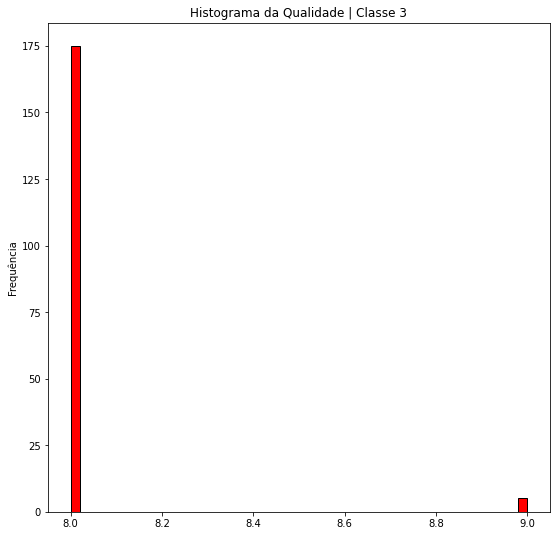

In [172]:
fig, ax = plt.subplots(figsize = (9,9))
plt.title("Histograma da Qualidade | Classe 3")
plt.ylabel("Frequência")
ax.hist(gqw["quality"], bins= 50, edgecolor="black", color="red")

###Média

In [173]:
gfa_mean = gqw["fixed acidity"].mean()
gva_mean = gqw["volatile acidity"].mean()
gca_mean = gqw["citric acid"].mean()
gch_mean = gqw["chlorides"].mean()
gfsd_mean = gqw["free sulfur dioxide"].mean()
gtsd_mean = gqw["total sulfur dioxide"].mean()
gden_mean = gqw["density"].mean()
gph_mean = gqw["pH"].mean()
gsu_mean = gqw["sulphates"].mean()
gal_mean = gqw["alcohol"].mean()

###Desvio Padrão

In [174]:
gfa_std = gqw["fixed acidity"].std()
gva_std = gqw["volatile acidity"].std()
gca_std = gqw["citric acid"].std()
gch_std = gqw["chlorides"].std()
gfsd_std = gqw["free sulfur dioxide"].std()
gtsd_std = gqw["total sulfur dioxide"].std()
gden_std = gqw["density"].std()
gph_std = gqw["pH"].std()
gsu_std = gqw["sulphates"].std()
gal_std = gqw["alcohol"].std()

#Distorção (Skewness)

In [175]:
gfa_skew = gqw["fixed acidity"].skew()
gva_skew = gqw["volatile acidity"].skew()
gca_skew = gqw["citric acid"].skew()
gch_skew = gqw["chlorides"].skew()
gfsd_skew = gqw["free sulfur dioxide"].skew()
gtsd_skew = gqw["total sulfur dioxide"].skew()
gden_skew = gqw["density"].skew()
gph_skew = gqw["pH"].skew()
gsu_skew = gqw["sulphates"].skew()
gal_skew = gqw["alcohol"].skew()

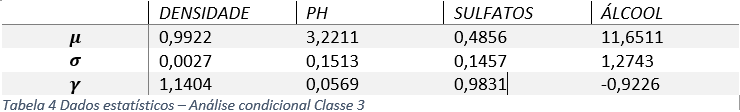

# Análise Bivariada Não-Condicional

##Correlograma

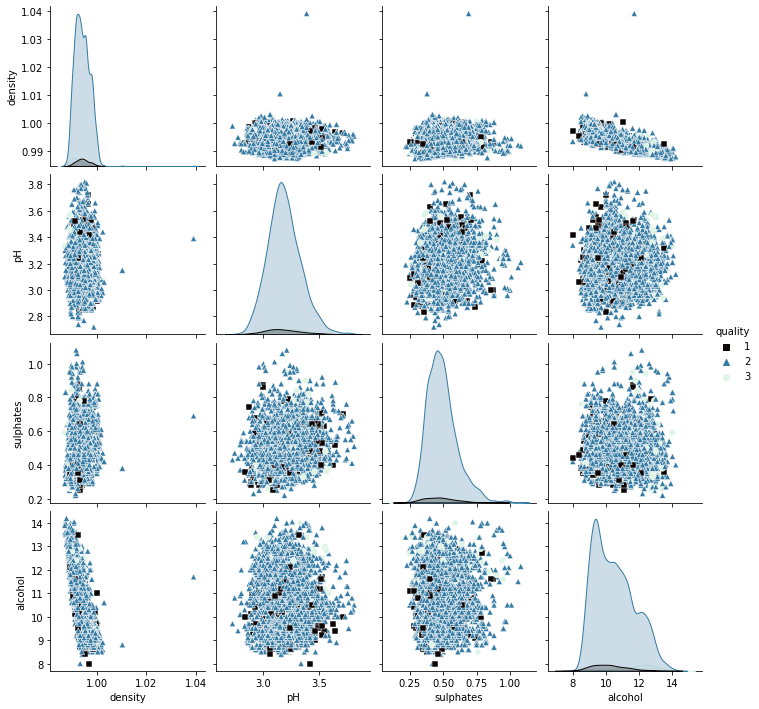

In [146]:
sns.pairplot(vinho_b2, kind="scatter", hue="quality", markers= ["s","^","o"],palette="mako")
plt.show()

###ScatterPlot com plt

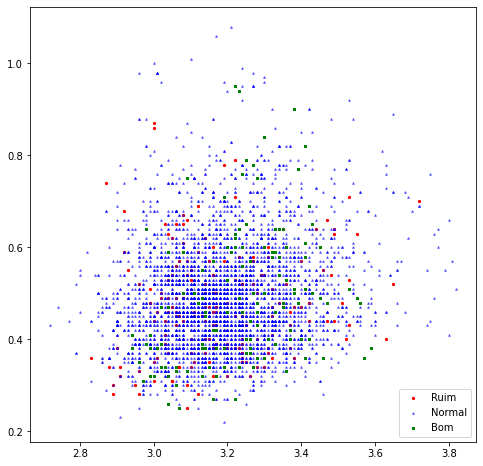

In [145]:
preditor_y=vinho_b["pH"].values
preditor_x=vinho_b["sulphates"].values
fig, ax = plt.subplots(figsize=(8,8))

bad= np.where( vinho_b["quality"] <=4)
ax.scatter(
        preditor_y[bad], preditor_x[bad], label= "Ruim",
        s=5, color="red", alpha=1, marker="o", 
    )

normal= np.where((vinho_b.quality >= 5) & (vinho_b.quality<=7))
ax.scatter(
        preditor_y[normal], preditor_x[normal], label= "Normal",
        s=3, color="blue", alpha=0.5, marker="^" ,
    )

good= np.where(vinho_b.quality >= 8)
ax.scatter(
        preditor_y[good], preditor_x[good], label= "Bom",
        s=5, color="green", alpha=1, marker="s"
    )
ax.legend(loc="lower right")

##Matriz de Correlação (Heatmap)

###Com todos os preditores

In [194]:
#Matriz de Correlação DataSet sem alguns preditores
vinho_b_corr = vinho_b.corr()
#vinho_b.drop("quality",axis=1,inplace=True)
vinho_b_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.081269
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.133461
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,0.023319
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,0.022185
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.078021
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.080482
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.013385
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.096324
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.033850
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.011761


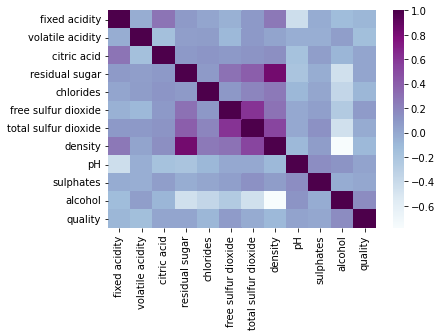

In [195]:
sns.heatmap(vinho_b_corr,cmap="BuPu")

###Com a remoção de preditores

In [193]:
#Matriz de Correlação DataSet sem alguns preditores
vinho_b2_corr = vinho_b2.corr()
#vinho_b2.drop("quality",axis=1,inplace=True)
vinho_b2_corr

,density,pH,sulphates,alcohol,quality
density,1.000000,-0.093591,0.074493,-0.780138,-0.096324
pH,-0.093591,1.000000,0.155951,0.121432,0.033850
sulphates,0.074493,0.155951,1.000000,-0.017433,0.011761
alcohol,-0.780138,0.121432,-0.017433,1.000000,0.162726
quality,-0.096324,0.033850,0.011761,0.162726,1.000000


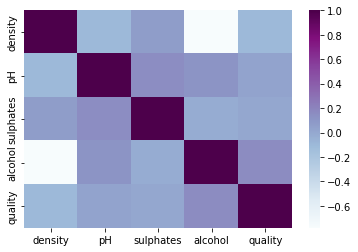

In [192]:
sns.heatmap(vinho_b2_corr,cmap="BuPu")

#Análise Multi-Variada Não-Condicional